##### Copyright 2019 The TensorFlow Authors.

2/2 [==============================] - 2s 31ms/step


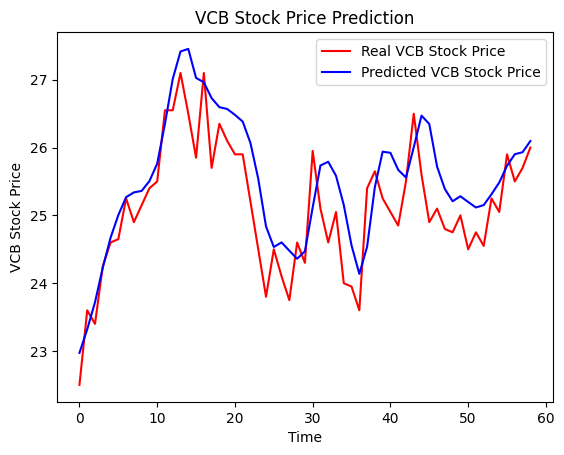

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os.path
from os import path
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Read stock data of VCB 2018->2022
dataset_train = pd.read_csv('/content/data-STB-train.csv')
training_set = dataset_train.iloc[:, 1:2].values

#  scale the price data to 0,1
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Create data to train train, X = 60 time steps, Y =  1 time step
X_train = []
y_train = []
no_of_sample = len(training_set)

for i in range(60, no_of_sample):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


# Build LSTM model
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# If model file existed then load
if path.exists("mymodel.h5"):
    regressor.load_weights("mymodel.h5")
else:
    # Else : train
    regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)
    regressor.save("mymodel.h5")

# Load data from 1/1/2023 - 30/3/2023
dataset_test = pd.read_csv('/content/data-STB-test-2.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Start predicting

dataset_total = pd.concat((dataset_train['Close'], dataset_test['Close']), axis = 0)


inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
no_of_sample = len(inputs)

for i in range(60, no_of_sample):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Draw line chart between the predicted price and the real one
plt.plot(real_stock_price, color = 'red', label = 'Real VCB Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted VCB Stock Price')
plt.title('VCB Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('VCB Stock Price')
plt.legend()
plt.show()


In [ ]:
# Calculate Mean Squared Error for LSTM
mse_lstm = mean_squared_error(real_stock_price, predicted_stock_price)

# Calculate Mean Absolute Error for LSTM
mae_lstm = mean_absolute_error(real_stock_price, predicted_stock_price)

print("MSE for LSTM: ", mse_lstm)
print("MAE for LSTM: ", mae_lstm)

MSE for LSTM:  0.3771555725152289
MAE for LSTM:  0.5096854581671244


Epoch 1/100
38/38 [==============================] - 12s 111ms/step - loss: 0.0239
Epoch 2/100
38/38 [==============================] - 5s 134ms/step - loss: 0.0104
Epoch 3/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0091
Epoch 4/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0068
Epoch 5/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0072
Epoch 6/100
38/38 [==============================] - 4s 110ms/step - loss: 0.0071
Epoch 7/100
38/38 [==============================] - 5s 138ms/step - loss: 0.0057
Epoch 8/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0057
Epoch 9/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0058
Epoch 10/100
38/38 [==============================] - 5s 137ms/step - loss: 0.0057
Epoch 11/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0053
Epoch 12/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0043
Epoch 13/100

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 2s 30ms/step


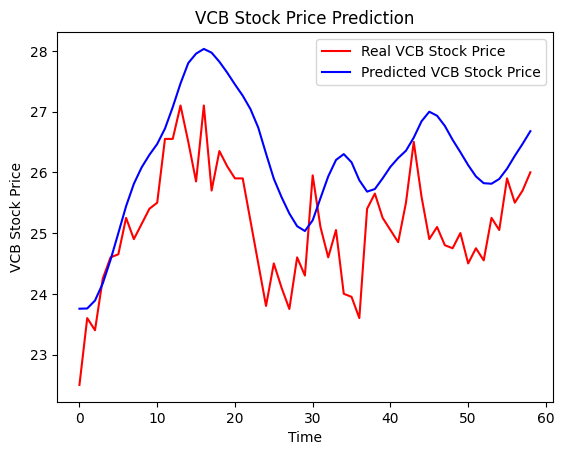

MSE for LSTM with RMSprop:  1.6743086529517235
MAE for LSTM with RMSprop:  1.1028456930386816


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os.path
from os import path
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import RMSprop
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Read stock data of VCB 2018->2022
dataset_train = pd.read_csv('/content/data-STB-train.csv')
training_set = dataset_train.iloc[:, 1:2].values

#  scale the price data to 0,1
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Create data to train train, X = 60 time steps, Y =  1 time step
X_train = []
y_train = []
no_of_sample = len(training_set)

for i in range(60, no_of_sample):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


# Build LSTM model
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer=RMSprop(lr=0.001), loss = 'mean_squared_error')

# If model file existed then load
if path.exists("mymodel2.h5"):
    regressor.load_weights("mymodel2.h5")
else:
    # Else : train
    regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)
    regressor.save("mymodel2.h5")

# Load data from 1/1/2023 - 30/3/2023
dataset_test = pd.read_csv('/content/data-STB-test-2.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Start predicting

dataset_total = pd.concat((dataset_train['Close'], dataset_test['Close']), axis = 0)


inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
no_of_sample = len(inputs)

for i in range(60, no_of_sample):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Draw line chart between the predicted price and the real one
plt.plot(real_stock_price, color = 'red', label = 'Real VCB Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted VCB Stock Price')
plt.title('VCB Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('VCB Stock Price')
plt.legend()
plt.show()
# Calculate Mean Squared Error for LSTM
mse_lstm = mean_squared_error(real_stock_price, predicted_stock_price)

# Calculate Mean Absolute Error for LSTM
mae_lstm = mean_absolute_error(real_stock_price, predicted_stock_price)

print("MSE for LSTM with RMSprop: ", mse_lstm)
print("MAE for LSTM with RMSprop: ", mae_lstm)

Epoch 1/100
38/38 [==============================] - 15s 105ms/step - loss: 0.1936
Epoch 2/100
38/38 [==============================] - 5s 135ms/step - loss: 0.1890
Epoch 3/100
38/38 [==============================] - 4s 105ms/step - loss: 0.1861
Epoch 4/100
38/38 [==============================] - 4s 105ms/step - loss: 0.1830
Epoch 5/100
38/38 [==============================] - 5s 134ms/step - loss: 0.1788
Epoch 6/100
38/38 [==============================] - 4s 104ms/step - loss: 0.1747
Epoch 7/100
38/38 [==============================] - 4s 104ms/step - loss: 0.1717
Epoch 8/100
38/38 [==============================] - 5s 135ms/step - loss: 0.1669
Epoch 9/100
38/38 [==============================] - 4s 107ms/step - loss: 0.1637
Epoch 10/100
38/38 [==============================] - 4s 105ms/step - loss: 0.1599
Epoch 11/100
38/38 [==============================] - 5s 136ms/step - loss: 0.1559
Epoch 12/100
38/38 [==============================] - 4s 104ms/step - loss: 0.1523
Epoch 13/100

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 2s 27ms/step


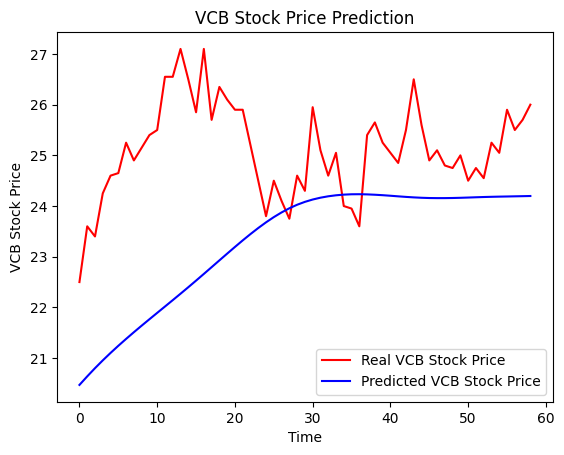

MSE for LSTM with Adadelta:  5.330458431020674
MAE for LSTM with Adadelta:  1.8559150372521354


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os.path
from os import path
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adadelta
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Read stock data of VCB 2018->2022
dataset_train = pd.read_csv('/content/data-STB-train.csv')
training_set = dataset_train.iloc[:, 1:2].values

#  scale the price data to 0,1
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Create data to train train, X = 60 time steps, Y =  1 time step
X_train = []
y_train = []
no_of_sample = len(training_set)

for i in range(60, no_of_sample):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


# Build LSTM model
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer=Adadelta(learning_rate=0.001, rho=0.95, epsilon=1e-07), loss = 'mean_squared_error')

# If model file existed then load
if path.exists("mymodel3.h5"):
    regressor.load_weights("mymodel3.h5")
else:
    # Else : train
    regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)
    regressor.save("mymodel3.h5")

# Load data from 1/1/2023 - 30/3/2023
dataset_test = pd.read_csv('/content/data-STB-test-2.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Start predicting

dataset_total = pd.concat((dataset_train['Close'], dataset_test['Close']), axis = 0)


inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
no_of_sample = len(inputs)

for i in range(60, no_of_sample):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Draw line chart between the predicted price and the real one
plt.plot(real_stock_price, color = 'red', label = 'Real VCB Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted VCB Stock Price')
plt.title('VCB Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('VCB Stock Price')
plt.legend()
plt.show()
# Calculate Mean Squared Error for LSTM
mse_lstm = mean_squared_error(real_stock_price, predicted_stock_price)

# Calculate Mean Absolute Error for LSTM
mae_lstm = mean_absolute_error(real_stock_price, predicted_stock_price)

print("MSE for LSTM with Adadelta: ", mse_lstm)
print("MAE for LSTM with Adadelta: ", mae_lstm)

2/2 [==============================] - 3s 43ms/step


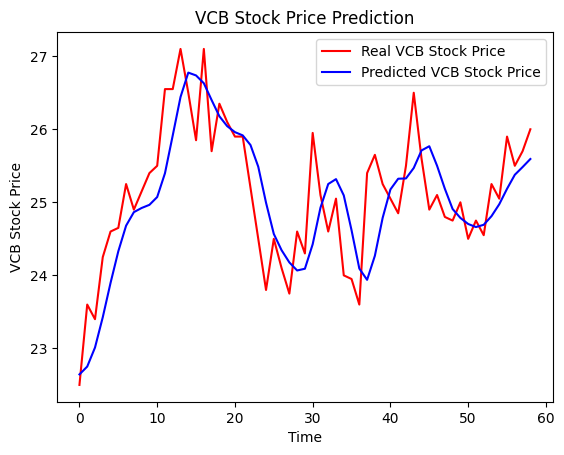

MSE for LSTM :  0.3811375116880624
MAE for LSTM :  0.487857779809984


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os.path
from os import path
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Read stock data of VCB 2018->2022
dataset_train = pd.read_csv('/content/data-STB-train.csv')
training_set = dataset_train.iloc[:, 1:2].values

#  scale the price data to 0,1
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Create data to train train, X = 60 time steps, Y =  1 time step
X_train = []
y_train = []
no_of_sample = len(training_set)

for i in range(60, no_of_sample):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


# Build LSTM model
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# If model file existed then load
if path.exists("mymodel4.h5"):
    regressor.load_weights("mymodel4.h5")
else:
    # Else : train
    regressor.fit(X_train, y_train, epochs = 200, batch_size = 128)
    regressor.save("mymodel4.h5")

# Load data from 1/1/2023 - 30/3/2023
dataset_test = pd.read_csv('/content/data-STB-test-2.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Start predicting

dataset_total = pd.concat((dataset_train['Close'], dataset_test['Close']), axis = 0)


inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
no_of_sample = len(inputs)

for i in range(60, no_of_sample):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Draw line chart between the predicted price and the real one
plt.plot(real_stock_price, color = 'red', label = 'Real VCB Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted VCB Stock Price')
plt.title('VCB Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('VCB Stock Price')
plt.legend()
plt.show()
# Calculate Mean Squared Error for LSTM
mse_lstm = mean_squared_error(real_stock_price, predicted_stock_price)

# Calculate Mean Absolute Error for LSTM
mae_lstm = mean_absolute_error(real_stock_price, predicted_stock_price)

print("MSE for LSTM : ", mse_lstm)
print("MAE for LSTM : ", mae_lstm)

Epoch 1/100
38/38 [==============================] - 14s 139ms/step - loss: 0.0300
Epoch 2/100
38/38 [==============================] - 4s 110ms/step - loss: 0.0048
Epoch 3/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0038
Epoch 4/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0039
Epoch 5/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0034
Epoch 6/100
38/38 [==============================] - 5s 141ms/step - loss: 0.0035
Epoch 7/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0033
Epoch 8/100
38/38 [==============================] - 4s 110ms/step - loss: 0.0031
Epoch 9/100
38/38 [==============================] - 5s 140ms/step - loss: 0.0031
Epoch 10/100
38/38 [==============================] - 4s 110ms/step - loss: 0.0038
Epoch 11/100
38/38 [==============================] - 4s 110ms/step - loss: 0.0033
Epoch 12/100
38/38 [==============================] - 5s 140ms/step - loss: 0.0024
Epoch 13/100

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 1s 27ms/step


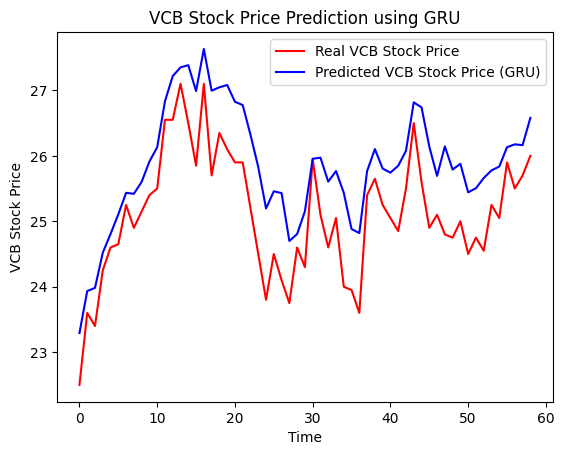

MSE for GRU:  0.684379542091389
MAE for GRU:  0.7471336170778434


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os.path
from os import path
from keras.models import Sequential
from keras.layers import Dense, GRU, Dropout
from sklearn.preprocessing import MinMaxScaler

# Read stock data of VCB 2018->2022
dataset_train = pd.read_csv('/content/data-STB-train.csv')
training_set = dataset_train.iloc[:, 1:2].values

# Scale the price data to 0,1
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Create data to train, X = 60 time steps, Y = 1 time step
X_train = []
y_train = []
no_of_sample = len(training_set)

for i in range(60, no_of_sample):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Build GRU model
regressor = Sequential()
regressor.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(GRU(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(GRU(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(GRU(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam', loss='mean_squared_error')

# If model file existed then load
if path.exists("mymodel_gru1.h5"):
    regressor.load_weights("mymodel_gru1.h5")
else:
    # Else: train
    regressor.fit(X_train, y_train, epochs=100, batch_size=32)
    regressor.save("mymodel_gru1.h5")

# Load data from 1/1/2023 - 30/3/2023
dataset_test = pd.read_csv('/content/data-STB-test-2.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Start predicting
dataset_total = pd.concat((dataset_train['Close'], dataset_test['Close']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

X_test = []
no_of_sample = len(inputs)

for i in range(60, no_of_sample):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Draw line chart between the predicted price and the real one
plt.plot(real_stock_price, color='red', label='Real VCB Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted VCB Stock Price (GRU)')
plt.title('VCB Stock Price Prediction using GRU')
plt.xlabel('Time')
plt.ylabel('VCB Stock Price')
plt.legend()
plt.show()
# Calculate Mean Squared Error for GRU
mse_gru = mean_squared_error(real_stock_price, predicted_stock_price)

# Calculate Mean Absolute Error for GRU
mae_gru = mean_absolute_error(real_stock_price, predicted_stock_price)

print("MSE for GRU: ", mse_gru)
print("MAE for GRU: ", mae_gru)

Epoch 1/100
38/38 [==============================] - 17s 86ms/step - loss: 0.0625
Epoch 2/100
38/38 [==============================] - 3s 85ms/step - loss: 0.0104
Epoch 3/100
38/38 [==============================] - 4s 94ms/step - loss: 0.0076
Epoch 4/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0067
Epoch 5/100
38/38 [==============================] - 3s 92ms/step - loss: 0.0057
Epoch 6/100
38/38 [==============================] - 4s 93ms/step - loss: 0.0053
Epoch 7/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0056
Epoch 8/100
38/38 [==============================] - 3s 87ms/step - loss: 0.0054
Epoch 9/100
38/38 [==============================] - 3s 86ms/step - loss: 0.0048
Epoch 10/100
38/38 [==============================] - 4s 110ms/step - loss: 0.0051
Epoch 11/100
38/38 [==============================] - 4s 91ms/step - loss: 0.0041
Epoch 12/100
38/38 [==============================] - 3s 87ms/step - loss: 0.0044
Epoch 13/100
38/38 [=

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


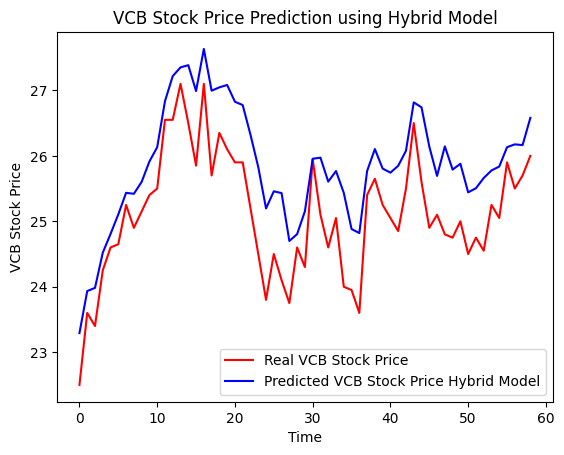

MSE for Hybrid Model:  0.684379542091389
MAE for Hybrid Model:  0.7471336170778434


In [10]:
import numpy as np
import pandas as pd
import os.path
from os import path
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU
import matplotlib.pyplot as plt
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

# Read stock data of VCB 2018->2022
dataset_train = pd.read_csv('/content/data-STB-train.csv')
training_set = dataset_train.iloc[:, 1:2].values

# Scale the price data to 0,1
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Create data to train, X = 60 time steps, Y = 1 time step
X_train = []
y_train = []
no_of_sample = len(training_set)

for i in range(60, no_of_sample):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
# Build LSTM model
lstm_regressor = Sequential()
lstm_regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_regressor.add(Dropout(0.2))
lstm_regressor.add(LSTM(units=50, return_sequences=True))
lstm_regressor.add(Dropout(0.2))
lstm_regressor.add(LSTM(units=50))
lstm_regressor.add(Dropout(0.2))
lstm_regressor.add(Dense(units=1))

# Build GRU model
gru_regressor = Sequential()
gru_regressor.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
gru_regressor.add(Dropout(0.2))
gru_regressor.add(GRU(units=50, return_sequences=True))
gru_regressor.add(Dropout(0.2))
gru_regressor.add(GRU(units=50))
gru_regressor.add(Dropout(0.2))
gru_regressor.add(Dense(units=1))

# Combined model
hybrid_model = Sequential()
hybrid_model.add(lstm_regressor)
hybrid_model.add(gru_regressor)
hybrid_model.add(Dense(units=1))

hybrid_model.compile(optimizer='adam', loss='mean_squared_error')

# If model file existed then load
if path.exists("combined_model.h5"):
    hybrid_model.load_weights("combined_model.h5")
else:
    # Else: train
    hybrid_model.fit(X_train, y_train, epochs=100, batch_size=32)
    hybrid_model.save("combined_model.h5")

# ... (rest of your prediction code remains unchanged) ...
# Load data from 1/1/2023 - 30/3/2023
dataset_test = pd.read_csv('/content/data-STB-test-2.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Start predicting
dataset_total = pd.concat((dataset_train['Close'], dataset_test['Close']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

X_test = []
no_of_sample = len(inputs)

for i in range(60, no_of_sample):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Draw line chart between the predicted price and the real one
plt.plot(real_stock_price, color='red', label='Real VCB Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted VCB Stock Price Hybrid Model')
plt.title('VCB Stock Price Prediction using Hybrid Model')
plt.xlabel('Time')
plt.ylabel('VCB Stock Price')
plt.legend()
plt.show()
# Calculate Mean Squared Error for GRU
mse_hybrid = mean_squared_error(real_stock_price, predicted_stock_price)

# Calculate Mean Absolute Error for GRU
mae_hybrid = mean_absolute_error(real_stock_price, predicted_stock_price)

print("MSE for Hybrid Model: ", mse_hybrid)
print("MAE for Hybrid Model: ", mae_hybrid)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# New Section

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow 2 quickstart for beginners

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/quickstart/beginner"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This short introduction uses [Keras](https://www.tensorflow.org/guide/keras/overview) to:

1. Load a prebuilt dataset.
1. Build a neural network machine learning model that classifies images.
2. Train this neural network.
3. Evaluate the accuracy of the model.

This tutorial is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. To run all the code in the notebook, select **Runtime** > **Run all**. To run the code cells one at a time, hover over each cell and select the **Run cell** icon.

![Run cell icon](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/images/beginner/run_cell_icon.png?raw=1)

## Set up TensorFlow

Import TensorFlow into your program to get started:

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.14.0


If you are following along in your own development environment, rather than [Colab](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb), see the [install guide](https://www.tensorflow.org/install) for setting up TensorFlow for development.

Note: Make sure you have upgraded to the latest `pip` to install the TensorFlow 2 package if you are using your own development environment. See the [install guide](https://www.tensorflow.org/install) for details.

## Load a dataset

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). The pixel values of the images range from 0 through 255. Scale these values to a range of 0 to 1 by dividing the values by `255.0`. This also converts the sample data from integers to floating-point numbers:

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


## Build a machine learning model

Build a `tf.keras.Sequential` model:

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

[`Sequential`](https://www.tensorflow.org/guide/keras/sequential_model) is useful for stacking layers where each layer has one input [tensor](https://www.tensorflow.org/guide/tensor) and one output tensor. Layers are functions with a known mathematical structure that can be reused and have trainable variables. Most TensorFlow models are composed of layers. This model uses the [`Flatten`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten), [`Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense), and [`Dropout`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) layers.

For each example, the model returns a vector of [logits](https://developers.google.com/machine-learning/glossary#logits) or [log-odds](https://developers.google.com/machine-learning/glossary#log-odds) scores, one for each class.

In [ ]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.34702495,  0.25367147,  0.5137056 ,  0.3318283 , -0.6127148 ,
        -0.07981458,  0.05705754,  0.28183186, -0.3341416 , -0.29850927]],
      dtype=float32)

The `tf.nn.softmax` function converts these logits to *probabilities* for each class:

In [ ]:
tf.nn.softmax(predictions).numpy()

array([[0.12774149, 0.11635607, 0.15091084, 0.12581491, 0.04892403,
        0.08336003, 0.0955874 , 0.11967927, 0.06464055, 0.06698538]],
      dtype=float32)

Note: It is possible to bake the `tf.nn.softmax` function into the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to provide an exact and numerically stable loss calculation for all models when using a softmax output.

Define a loss function for training using `losses.SparseCategoricalCrossentropy`:

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

The loss function takes a vector of ground truth values and a vector of logits and returns a scalar loss for each example. This loss is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.math.log(1/10) ~= 2.3`.

In [ ]:
loss_fn(y_train[:1], predictions).numpy()

2.4845862

Before you start training, configure and compile the model using Keras `Model.compile`. Set the [`optimizer`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) class to `adam`, set the `loss` to the `loss_fn` function you defined earlier, and specify a metric to be evaluated for the model by setting the `metrics` parameter to `accuracy`.

In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## Train and evaluate your model

Use the `Model.fit` method to adjust your model parameters and minimize the loss:

In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3048 - accuracy: 0.9099
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1468 - accuracy: 0.9558
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1075 - accuracy: 0.9675
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0883 - accuracy: 0.9734
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0752 - accuracy: 0.9763


The `Model.evaluate` method checks the model's performance, usually on a [validation set](https://developers.google.com/machine-learning/glossary#validation-set) or [test set](https://developers.google.com/machine-learning/glossary#test-set).

In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

The image classifier is now trained to ~98% accuracy on this dataset. To learn more, read the [TensorFlow tutorials](https://www.tensorflow.org/tutorials/).

If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:

In [ ]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [ ]:
probability_model(x_test[:5])

## Conclusion

Congratulations! You have trained a machine learning model using a prebuilt dataset using the [Keras](https://www.tensorflow.org/guide/keras/overview) API.

For more examples of using Keras, check out the [tutorials](https://www.tensorflow.org/tutorials/keras/). To learn more about building models with Keras, read the [guides](https://www.tensorflow.org/guide/keras). If you want learn more about loading and preparing data, see the tutorials on [image data loading](https://www.tensorflow.org/tutorials/load_data/images) or [CSV data loading](https://www.tensorflow.org/tutorials/load_data/csv).
